In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataPath = "datasets/Crime_Data_from_2020_to_Present_20240305.csv"
data = pd.read_csv(dataPath)
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
df = data[['DATE OCC', 'TIME OCC', 'AREA', 'Crm Cd','Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd']]
# Define new column names
new_columns = ['date', 'time', 'area', 'crm_cd', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd']
# Assign the new column names to the DataFrame
df.columns = new_columns
df.head(2)

,date,time,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd
0,03/01/2020 12:00:00 AM,2130,7,510,0,M,O,101.0
1,02/08/2020 12:00:00 AM,1800,1,330,47,M,O,128.0


In [8]:
def cat_stats(df):
    # df = data.copy()
    ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona',
                                        'num_miss', 'pct_miss'])
    tmp = pd.DataFrame()

    for c in df.columns:
        tmp['column'] = [c]
        if isinstance(df[c].iloc[0], (int, float, complex)):
            values = df[c].fillna(-777).unique()
        else:
            values = df[c].fillna('NaN').unique()
        values.sort()
        tmp['values'] = [values]
        tmp['values_count_incna'] = len(list(df[c].unique()))
        tmp['values_count_nona'] = int(df[c].nunique())
        tmp['num_miss'] = df[c].isnull().sum()
        tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
        ds_cat_stats = pd.concat([ds_cat_stats, tmp])

    ds_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

    # And set the index to Column Names
    ds_cat_stats.set_index('column', inplace = True)
    return ds_cat_stats

cat_stats(df)

C:\Users\gemj9\AppData\Local\Temp\ipykernel_20680\2205305301.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ds_cat_stats = pd.concat([ds_cat_stats, tmp])


,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
vict_sex,"[-, F, H, M, NaN, X]",6,5,119391,13.2
area,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,21,0,0.0
vict_descent,"[-, A, B, C, D, F, G, H, I, J, K, L, NaN, O, P...",21,20,119399,13.2
vict_age,"[-4, -3, -2, -1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10...",104,104,0,0.0
crm_cd,"[110, 113, 121, 122, 210, 220, 230, 231, 235, ...",139,139,0,0.0
premis_cd,"[-777.0, 101.0, 102.0, 103.0, 104.0, 105.0, 10...",315,314,10,0.0
time,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1439,1439,0,0.0
date,"[01/01/2020 12:00:00 AM, 01/01/2021 12:00:00 A...",1511,1511,0,0.0


c:\Users\gemj9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


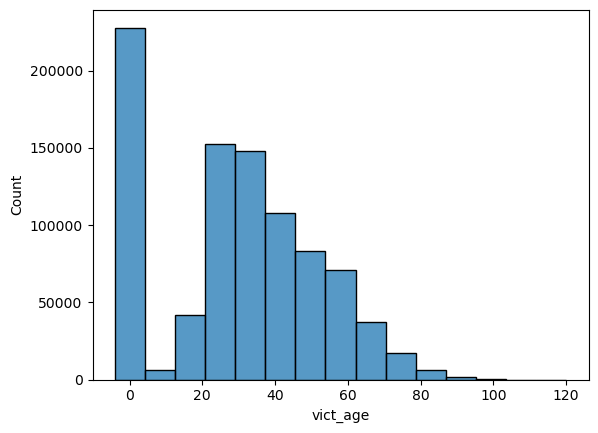

Percentage of ilogical values in vict_age column:
25.14%


c:\Users\gemj9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


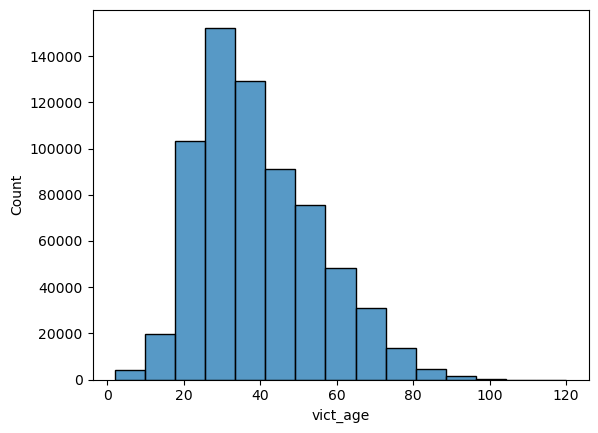

In [9]:
# Create a histogram
sns.histplot(data=df, x='vict_age', bins=15, kde=False)
plt.show()

# Calculate percentage of ilogical age values ( < 1 )
wrong_values = df.loc[df['vict_age'] < 1, 'vict_age'].count() / df['vict_age'].count() * 100
print("Percentage of ilogical values in vict_age column:")
print('{:2.2f}%'.format(wrong_values))
df = df[df['vict_age'] > 0]

# Create a histogram
sns.histplot(data=df, x='vict_age', bins=15, kde=False)
plt.show()

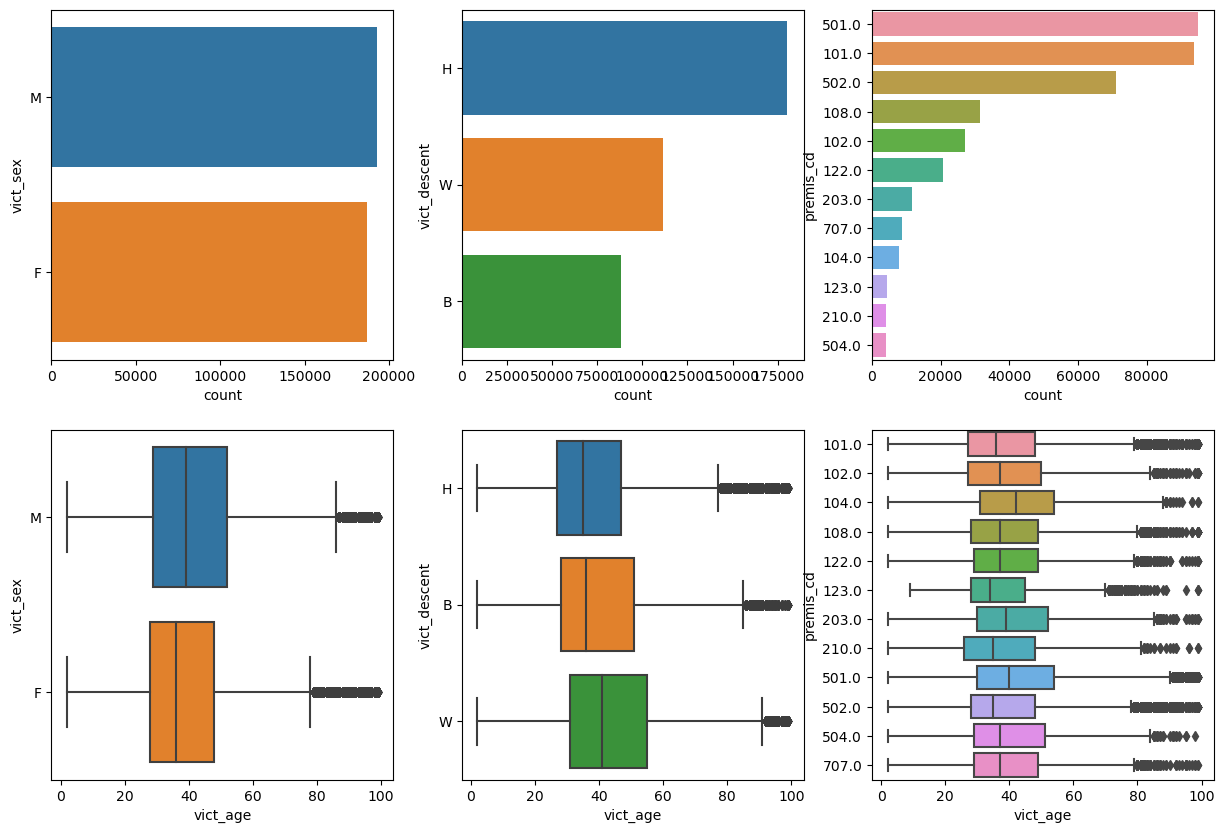

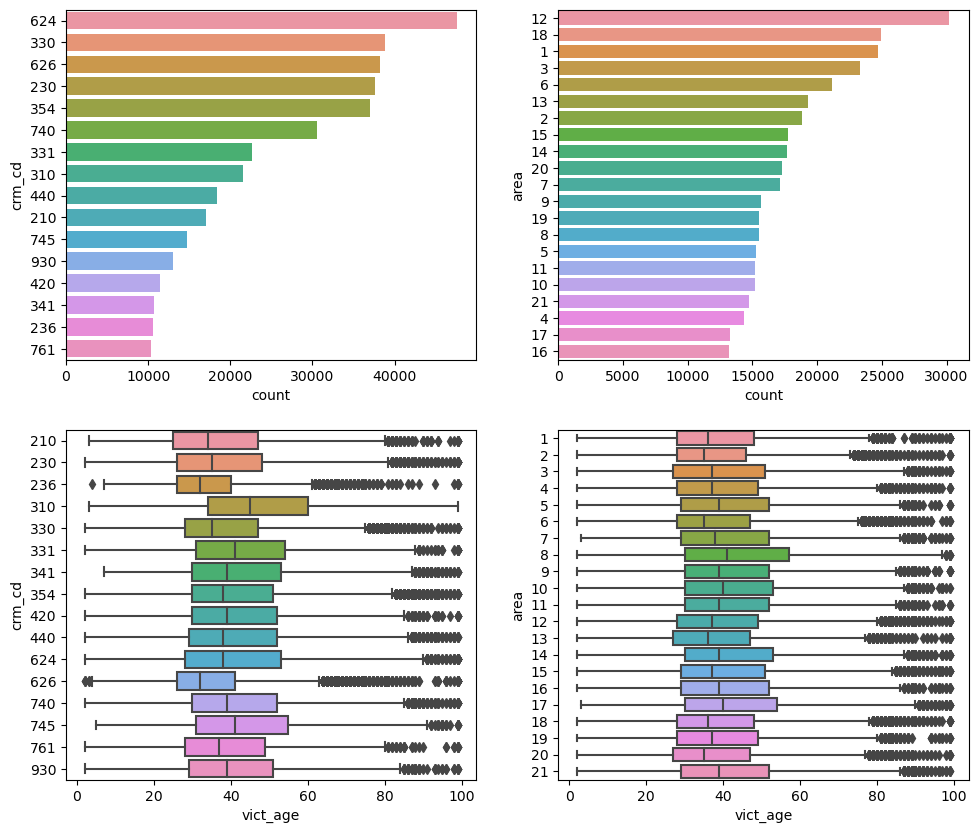

In [47]:
cat_cols = ['vict_sex', 'vict_descent','premis_cd', 'crm_cd', 'area']

def filterPercent(data, cols, percent):
    for col in cols:
        value_counts = data[col].value_counts()
        # Step 2: Calculate cumulative percentage
        cumulative_perc = value_counts.cumsum() / value_counts.sum() * 100
        # Identify the characters that make up the first 80% of the data
        chars_to_keep = cumulative_perc[cumulative_perc <= percent].index.tolist()
        if cumulative_perc[cumulative_perc > 80].index.size > 0:
            first_char_over_perc = cumulative_perc[cumulative_perc > percent].index[0]
            chars_to_keep.append(first_char_over_perc)
        # Step 3: Filter the DataFrame
        data = data[data[col].isin(chars_to_keep)]
    return data

def doBarplot(data):
    for col in cat_cols:
        category_order = data[col].value_counts().index
        sns.countplot(y=col, data=data, order=category_order)
        plt.show()

def doBoxplotVsAge(data):
    for col in cat_cols:
        sns.boxplot(x=col, y='vict_age', data=data, orient='v')
        plt.show()

def plotFrecuency(data):
    fig = plt.figure(figsize=(15,10))
    iax = 1
    for col in cat_cols:
        if iax <= 3:
            ax1 = fig.add_subplot(2, 3, iax)
            category_order = data[col].value_counts().index
            sns.countplot(y=col, data=data, order=category_order, ax=ax1, orient='h')

            ax2 = fig.add_subplot(2, 3, iax+3)
            sns.boxplot(y=col, x='vict_age', data=data, orient='h', ax=ax2)
        iax += 1
        if iax > 3:
            fig = plt.figure(figsize=(18,10))
            iax = 1


df = filterPercent(df, [ 'premis_cd', 'crm_cd', 'vict_descent', 'vict_sex'], 90)
plotFrecuency(df)

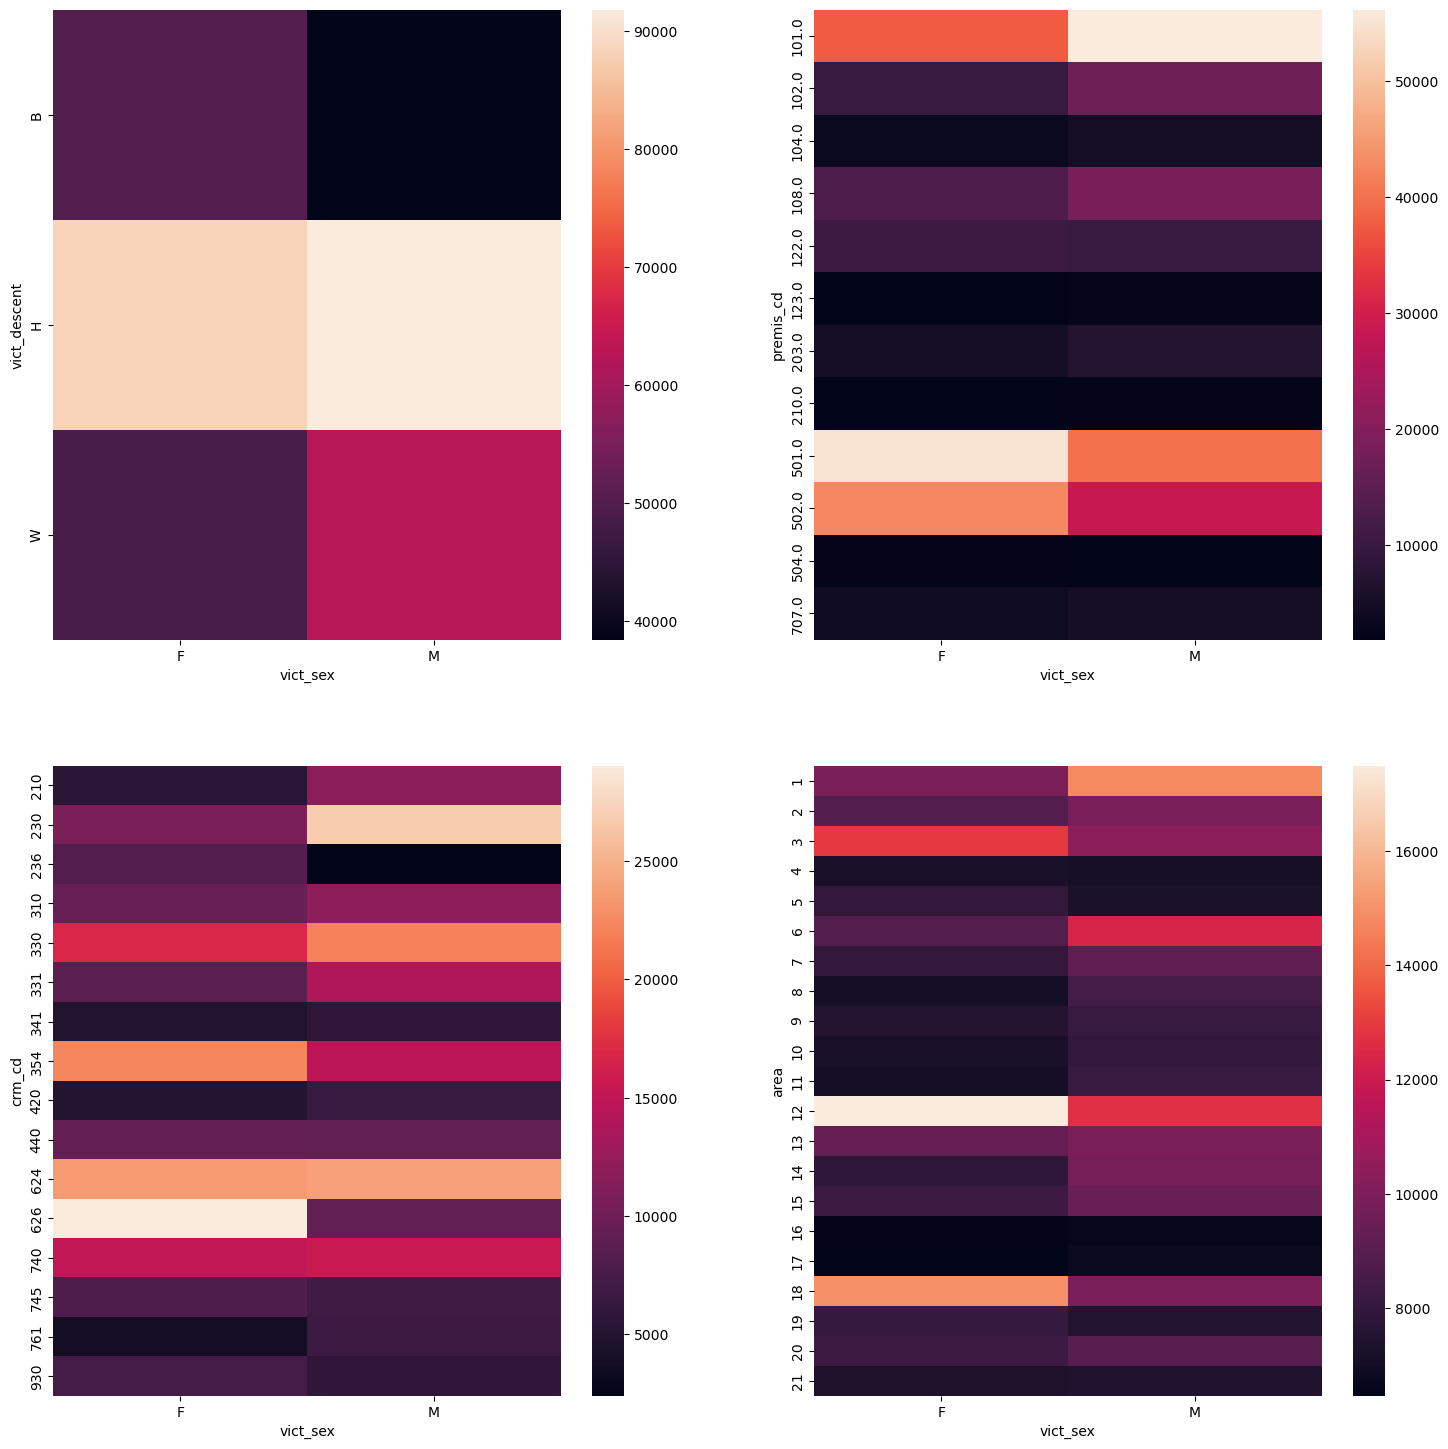

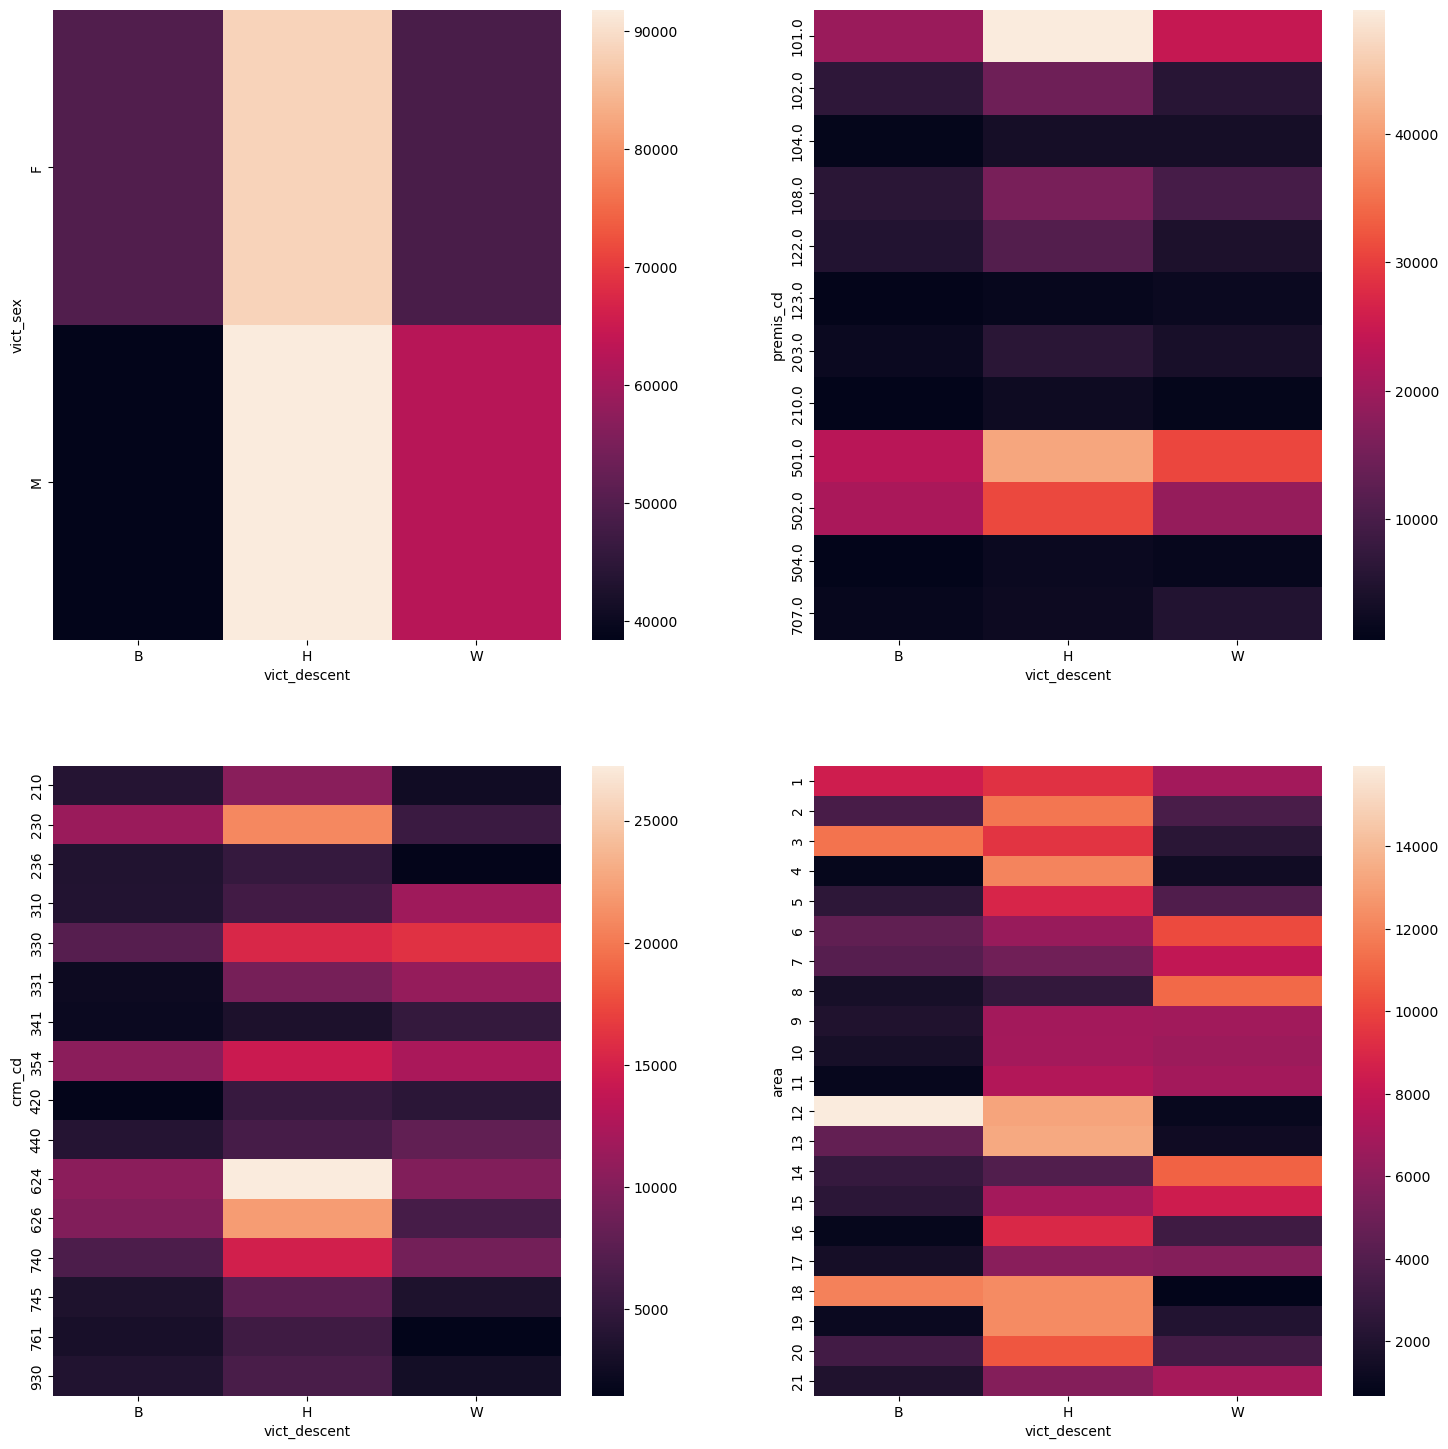

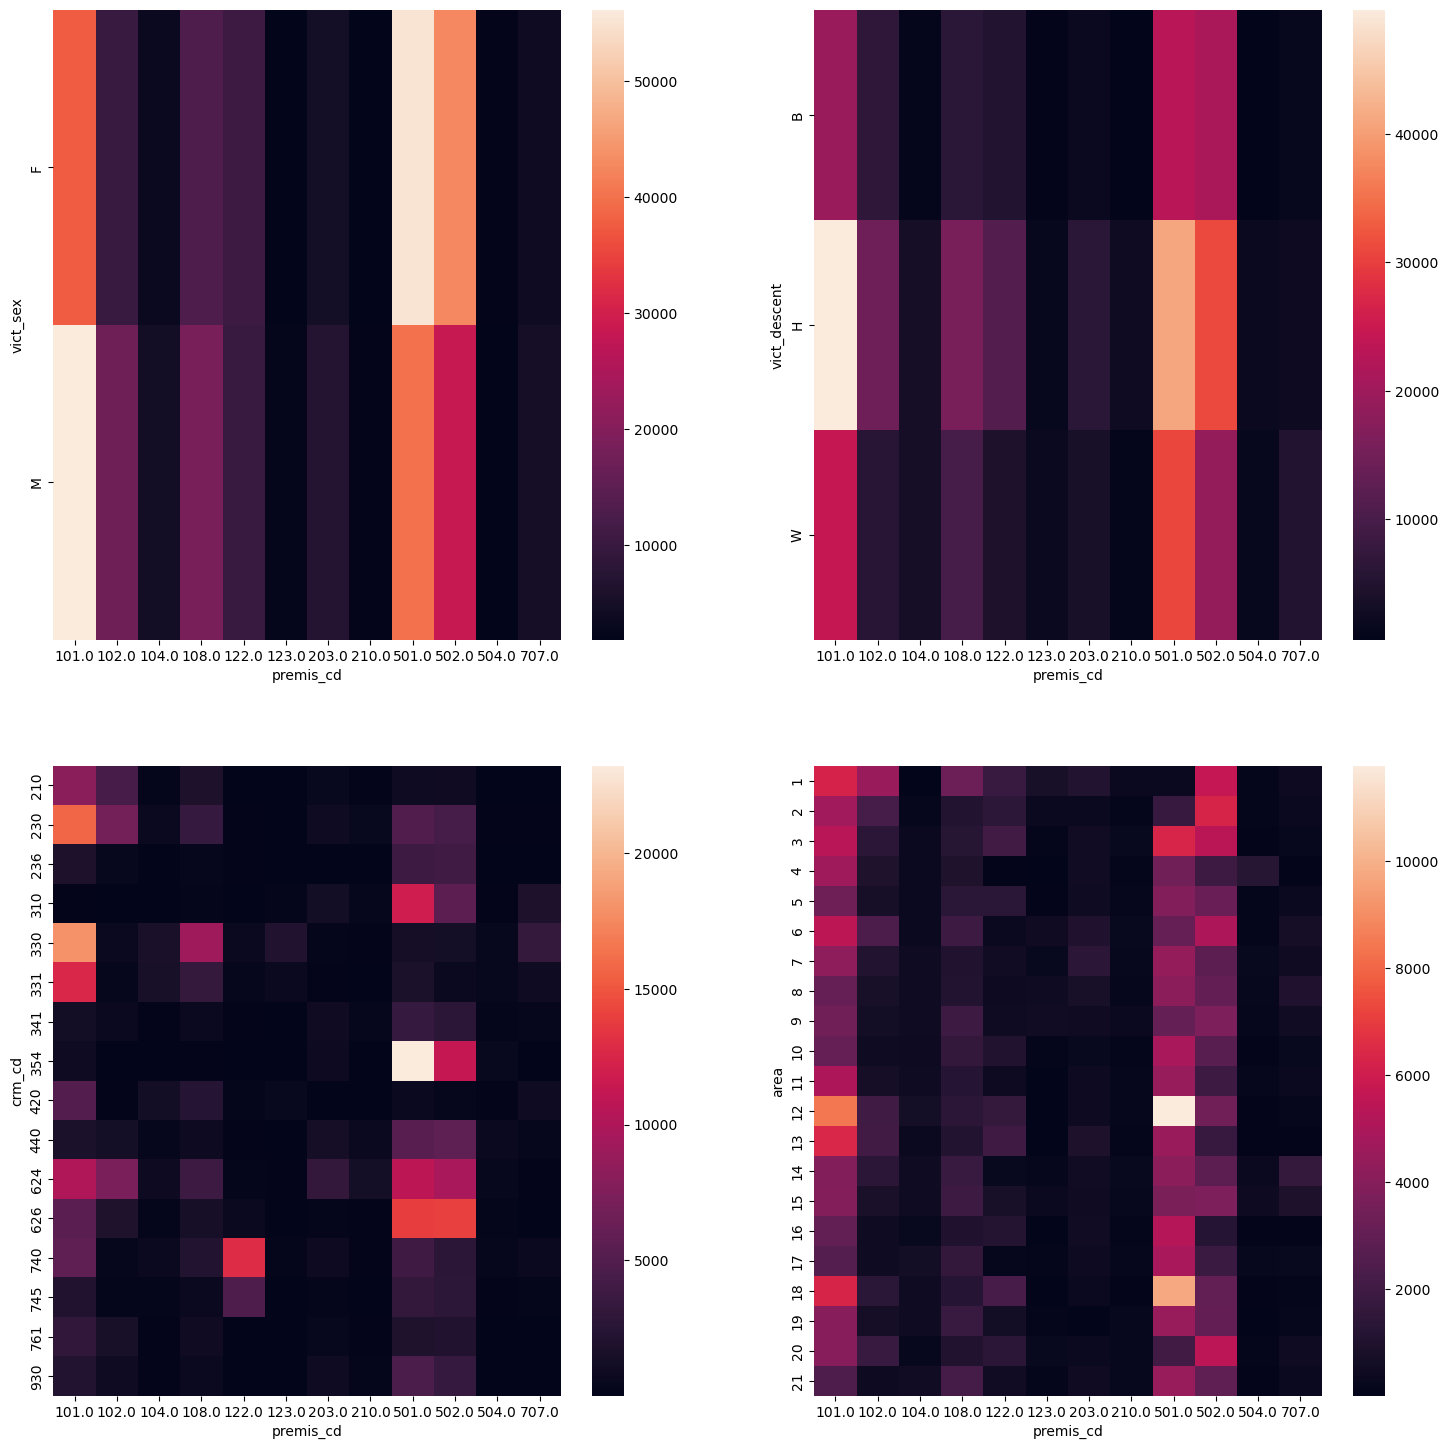

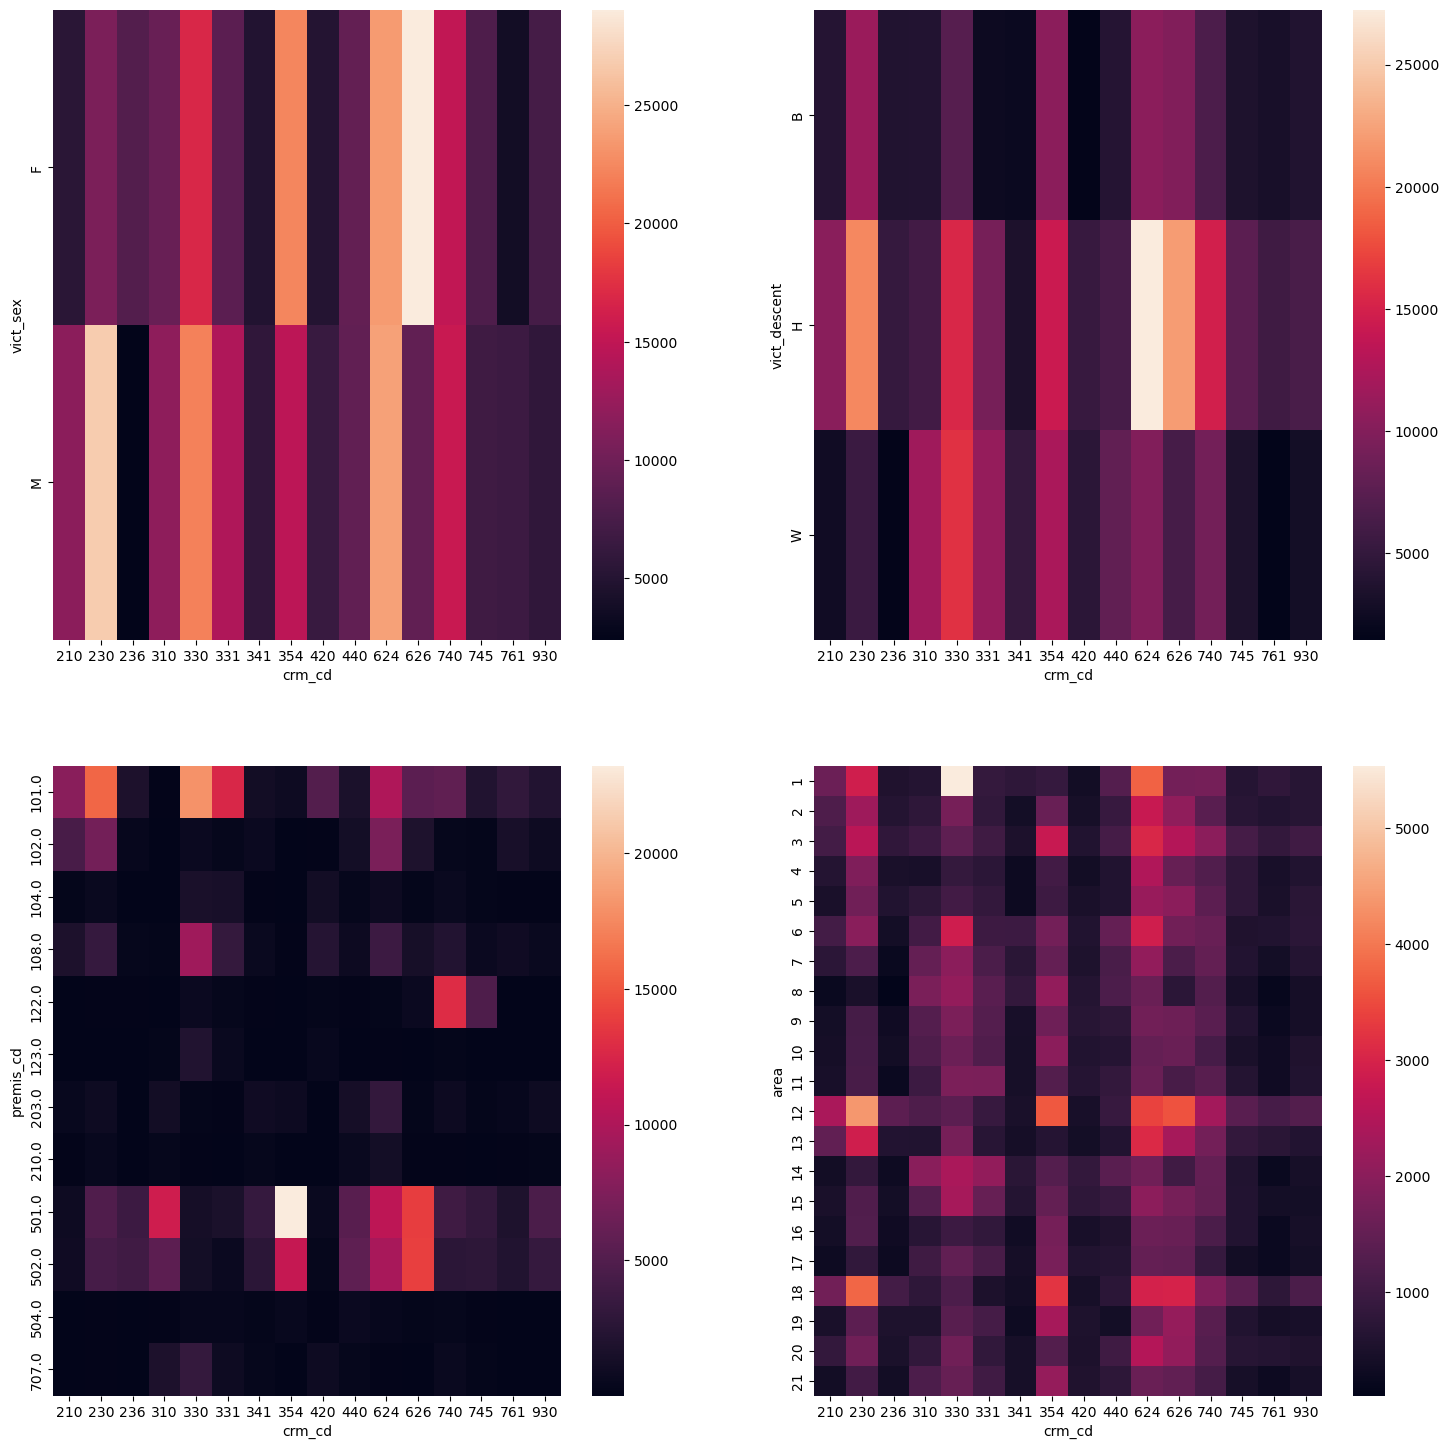

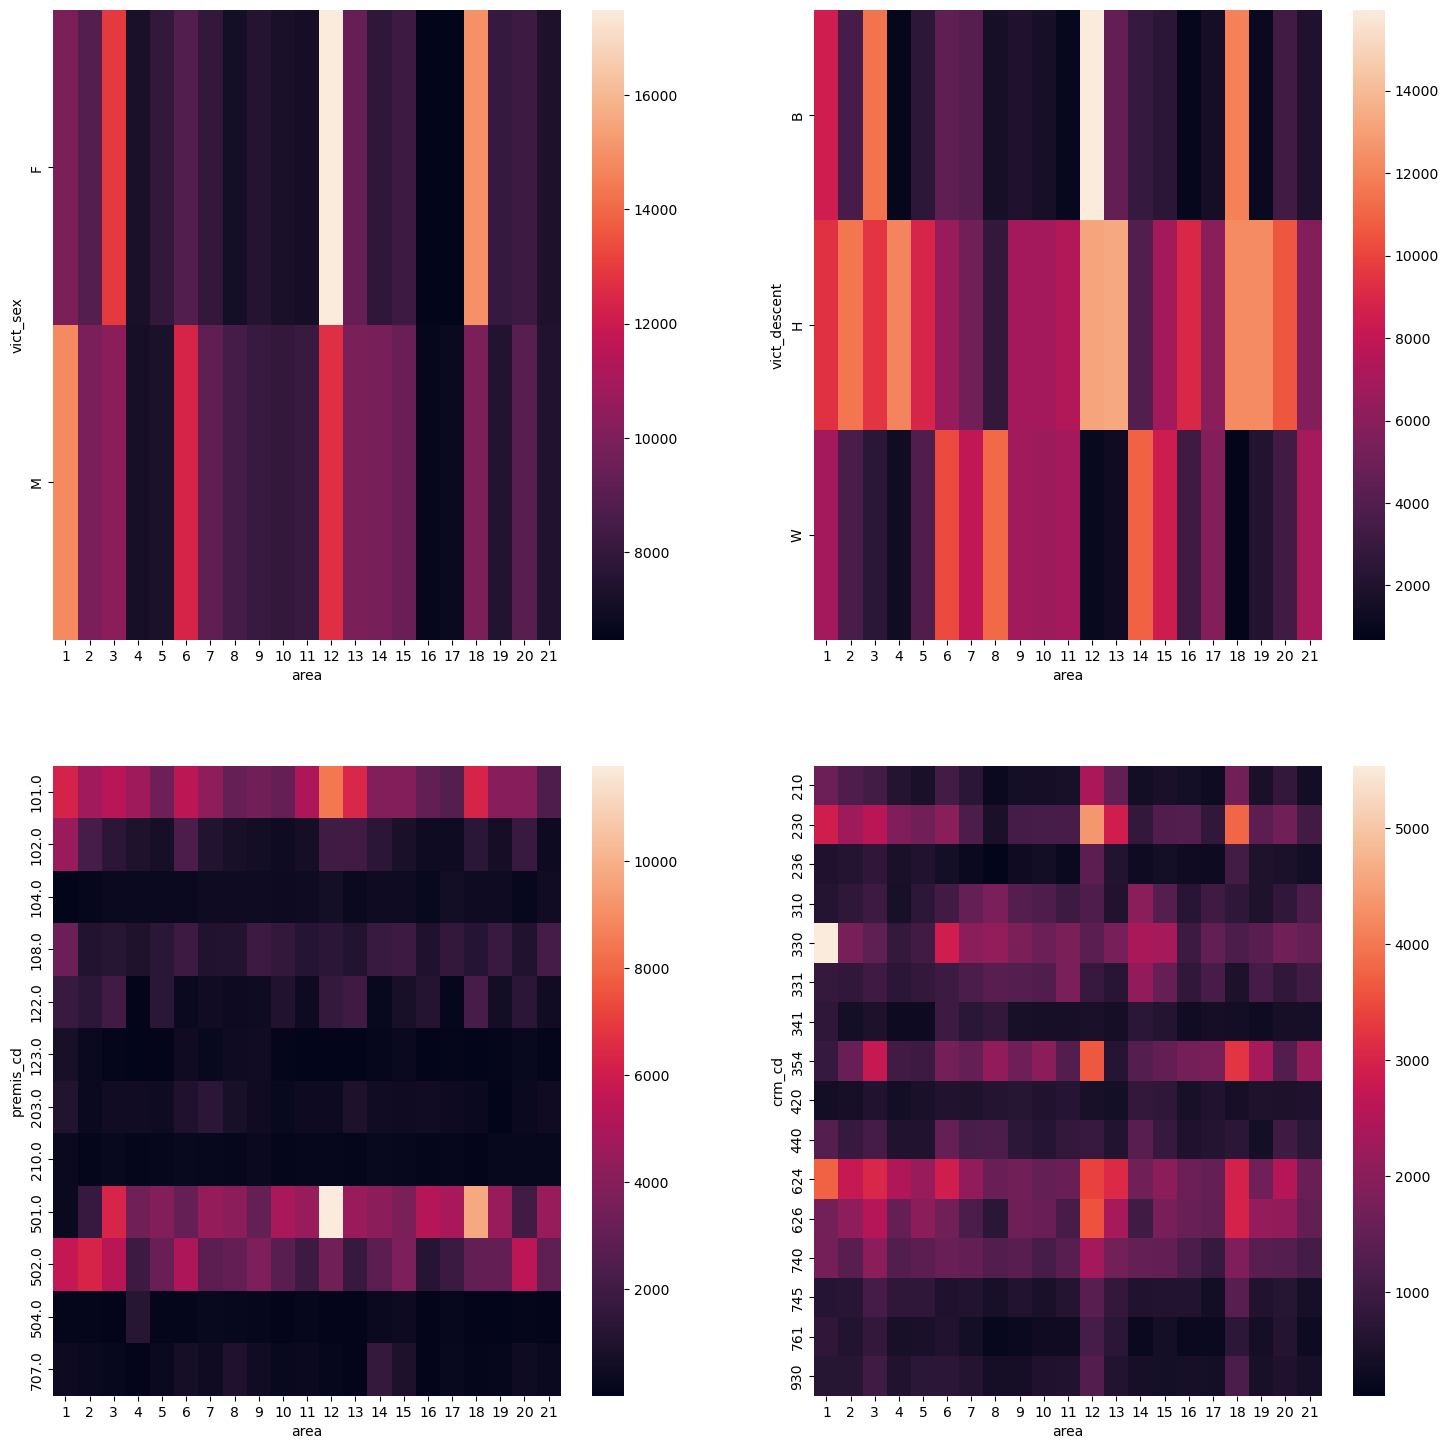

In [55]:
def plotHeatmaps(data):
    for col1 in data.columns:
        fig, axs = plt.subplots(2, 2, figsize=(18, 18))  # Creates a 2x2 grid of subplots
        axs = axs.flatten()  # Flatten the array to make iteration easier
        cols = [x for x in data.columns if x != col1]
        
        for ax, col2 in zip(axs, cols):
            ct = pd.crosstab(data[col2], data[col1])
            sns.heatmap(ct, ax=ax)

plotHeatmaps(df[cat_cols])

In [ ]:
pip install dython

In [44]:
from dython.nominal import theils_u

def catHeatmap(data):
    # data = data.copy()
    tmp = pd.DataFrame(columns=data.columns)

    for col1 in data.columns:
        for col2 in data.columns:
            theils_u_value = theils_u(x=data[col1], y=data[col2])
            tmp.loc[col1, col2] = theils_u_value
            
    tmp = tmp.apply(pd.to_numeric, errors='coerce')
    return tmp
                
corr = catHeatmap(df[cat_cols])

<Axes: >

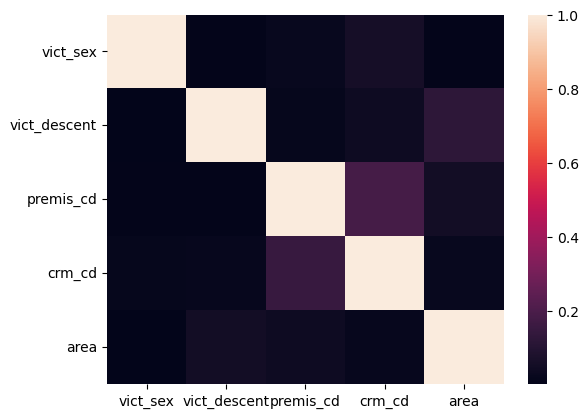

In [45]:
sns.heatmap(corr)

In [ ]:
sample_data = {
    'Column1': range(1, 11),  # Sample data for Column1
    'Column2': range(11, 21),  # Sample data for Column2
    'Column3': range(21, 31)  # Sample data for Column3
}
# sample_df = pd.DataFrame(sample_data, index=[0,9,8,7,6,5,4,3,2,1])
sample_df = pd.DataFrame(sample_data)
sample_df.index = [0,9,8,7,6,5,4,3,2,1]
sample_df

,Column1,Column2,Column3
0,1,11,21
9,2,12,22
8,3,13,23
7,4,14,24
6,5,15,25
5,6,16,26
4,7,17,27
3,8,18,28
2,9,19,29
1,10,20,30
